In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Read Dataset  and set col index
#created one column (Sl No) in excel file to set up as index column
data=pd.read_csv('C:\\Users\\csstf107\\Desktop\\Train.csv',index_col=0)
print(data.head())
print(data.shape)
print(data.columns)
%matplotlib inline

                                  country age_group               travel_with  \
Tour_ID                                                                         
tour_id1hffseyw                     ITALY     45-64             With Children   
tour_idnacd7zag            UNITED KINGDOM     25-44               With Spouse   
tour_id62vz7e71  UNITED STATES OF AMERICA       65+               With Spouse   
tour_idrc76tzix                    RWANDA     25-44  With Spouse and Children   
tour_idn723m0n9  UNITED STATES OF AMERICA     45-64                     Alone   

                 total_female  total_male                         purpose  \
Tour_ID                                                                     
tour_id1hffseyw           0.0         2.0  Visiting Friends and Relatives   
tour_idnacd7zag           1.0         1.0            Leisure and Holidays   
tour_id62vz7e71           1.0         1.0            Leisure and Holidays   
tour_idrc76tzix           3.0         1.0      

In [2]:
l2=[]
l1=data['age_group'].tolist()
#print(l1)
for i in l1:
    if i=='18-24':
        age='young'
    elif i=='25-44':
        age='adult'
    elif i=='45-64':
        age='senior'
    else:
        age='super_senior'
    l2.append(age)

data['age']=l2


data.dtypes

country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
cost_category             object
age                       object
dtype: object

In [3]:
l2=[]
l1=data['night_mainland'].tolist()
j=0
count=0
for i in l1:
    if i==0:
        i=11
        l2.append(i)
        continue
        
    j+=1
    if i>60 and j%200!=0:
        i=i/4
        count=count+1
        l2.append(i)
    elif i>23:
        i=22
        count=count+1
        l2.append(i)
    else:
        l2.append(i)
print(count)
data['night_mainland']=l2
l1=data['night_mainland'].tolist()


1135


In [4]:
#night_zanzibar
l2=[]
l1=data['night_zanzibar'].tolist()
j=0
count=0
for i in l1:
    if i==0:
        i=5
        l2.append(i)
        continue
    j+=1
    if i>20 and j%200!=0:
        i=i/4
        count=count+1
        l2.append(i)
    elif i>10:
        i=9
        count=count+1
        l2.append(i)
    else:
        l2.append(i)
print(count)
data['night_zanzibar']=l2
l1=data['night_zanzibar'].tolist()

729


In [5]:
#PreProcessing
#Missing value Handling
data.isna().sum()

data['total_female']=data['total_female'].fillna(data['total_female'].median())

data['total_male']=data['total_male'].fillna(data['total_male'].median())

data['travel_with'].value_counts()

data.ffill(axis=0,inplace=True)

data['travel_with'].value_counts()

from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['travel_with']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

label_en=LabelEncoder()
a=['purpose']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])
label_en=LabelEncoder()
a=['main_activity']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])
label_en=LabelEncoder()
a=['info_source']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

labelenc=LabelEncoder()
a=['travel_with']
for i in np.arange(len(a)):
    data[a[i]]=labelenc.fit_transform(data[a[i]])

data['travel_with'].value_counts()

data['travel_with']=data['travel_with'].fillna(data['travel_with'].mode())


data.isna().sum()
print(data)

                                  country age_group  travel_with  \
Tour_ID                                                            
tour_id1hffseyw                     ITALY     45-64            1   
tour_idnacd7zag            UNITED KINGDOM     25-44            3   
tour_id62vz7e71  UNITED STATES OF AMERICA       65+            3   
tour_idrc76tzix                    RWANDA     25-44            4   
tour_idn723m0n9  UNITED STATES OF AMERICA     45-64            0   
...                                   ...       ...          ...   
tour_idmp5ciw50                     KENYA     45-64            0   
tour_ideq0yncfs                     KENYA     45-64            0   
tour_idv7pz3vs8  UNITED STATES OF AMERICA     25-44            4   
tour_idy6ydo00w  UNITED STATES OF AMERICA     25-44            3   
tour_idceoq9por                      OMAN     25-44            4   

                 total_female  total_male  purpose  main_activity  \
Tour_ID                                       

In [6]:
labelenc=LabelEncoder()
a=['cost_category']
for i in np.arange(len(a)):
    data[a[i]]=labelenc.fit_transform(data[a[i]])

    
labelenc=LabelEncoder()
a=['country']
for i in np.arange(len(a)):
    data[a[i]]=labelenc.fit_transform(data[a[i]])
    
data.columns

labelenc=LabelEncoder()
a=['age']
for i in np.arange(len(a)):
    data[a[i]]=labelenc.fit_transform(data[a[i]])

data.columns
data.drop(['age_group'],axis=1,inplace=True)

data['total_size']=data['total_male']+data['total_female']
data.drop(['total_male'],axis=1,inplace=True)
data.drop(['total_female'],axis=1,inplace=True)

data.dtypes

#data.drop(['country'],axis=1,inplace=True)

country                    int32
travel_with                int32
purpose                    int32
main_activity              int32
info_source                int32
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
first_trip_tz             object
cost_category              int32
age                        int32
total_size               float64
dtype: object

In [7]:
data.dtypes
dummies = pd.get_dummies(data[['tour_arrangement','package_transport_int','package_accomodation','package_food','package_transport_tz','package_sightseeing','package_guided_tour','package_insurance','first_trip_tz']], drop_first=True)
data = pd.concat([data.drop(['tour_arrangement','package_transport_int','package_accomodation','package_food','package_transport_tz','package_sightseeing','package_guided_tour','package_insurance','first_trip_tz'],axis=1), dummies],axis=1)
data.dtypes

country                            int32
travel_with                        int32
purpose                            int32
main_activity                      int32
info_source                        int32
night_mainland                   float64
night_zanzibar                   float64
cost_category                      int32
age                                int32
total_size                       float64
tour_arrangement_Package Tour      uint8
package_transport_int_Yes          uint8
package_accomodation_Yes           uint8
package_food_Yes                   uint8
package_transport_tz_Yes           uint8
package_sightseeing_Yes            uint8
package_guided_tour_Yes            uint8
package_insurance_Yes              uint8
first_trip_tz_Yes                  uint8
dtype: object

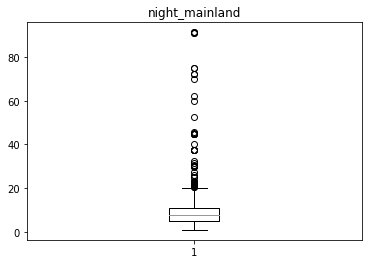

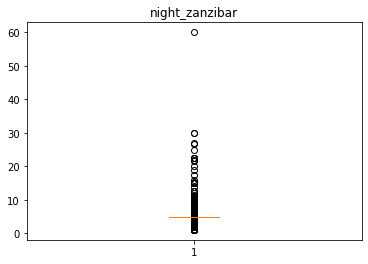

In [8]:
plt.boxplot(data['night_mainland'])
plt.title("night_mainland")
plt.show()

plt.boxplot(data['night_zanzibar'])
plt.title("night_zanzibar")
plt.show()








In [9]:
Q1=np.percentile(data['night_mainland'],25,interpolation='midpoint')
Q2=np.percentile(data['night_mainland'],50,interpolation='midpoint')
Q3=np.percentile(data['night_mainland'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=0
uplim=Q3+1.5*IQR
print(lowlim)
print(uplim)
outlier = []
for x in data['night_mainland']:
    if ((x>uplim)):
        outlier.append(x)
ind1=data['night_mainland']>uplim
x=data.loc[ind1].index

data.drop(x,inplace = True)

Q1=np.percentile(data['night_zanzibar'],25,interpolation='midpoint')
Q2=np.percentile(data['night_zanzibar'],50,interpolation='midpoint')
Q3=np.percentile(data['night_zanzibar'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=0
uplim=Q3+1.5*IQR
print(lowlim)
print(uplim)
outlier = []
for x in data['night_zanzibar']:
    if ((x>uplim)):
        outlier.append(x)
ind1=data['night_zanzibar']>uplim
y=data.loc[ind1].index

data.drop(y,inplace = True)

0
20.0
0
5.0


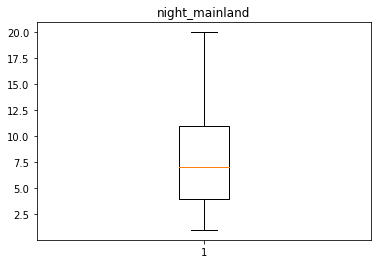

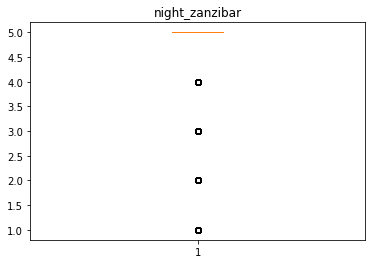

In [10]:

plt.boxplot(data['night_mainland'])
plt.title("night_mainland")
plt.show()

plt.boxplot(data['night_zanzibar'])
plt.title("night_zanzibar")
plt.show()

In [11]:
y=data['cost_category']
x=data.drop(['cost_category'],axis=1)


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=.2)

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='liblinear')
logit.fit(x_train, y_train)
y_pred = logit.predict(x_test)
#from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
print("Accuracy percentage is",accuracy_score(y_test,y_pred))

#print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy percentage is 0.5169522420707254


Accuracy percentage is 0.5552314983594604
[0.15348109 0.04977919 0.04599983 0.08747028 0.06585662 0.16147522
 0.03554106 0.06178439 0.05963786 0.06512554 0.02204125 0.0413026
 0.03766453 0.02895336 0.02020768 0.02231816 0.01322183 0.02813952]


<AxesSubplot:>

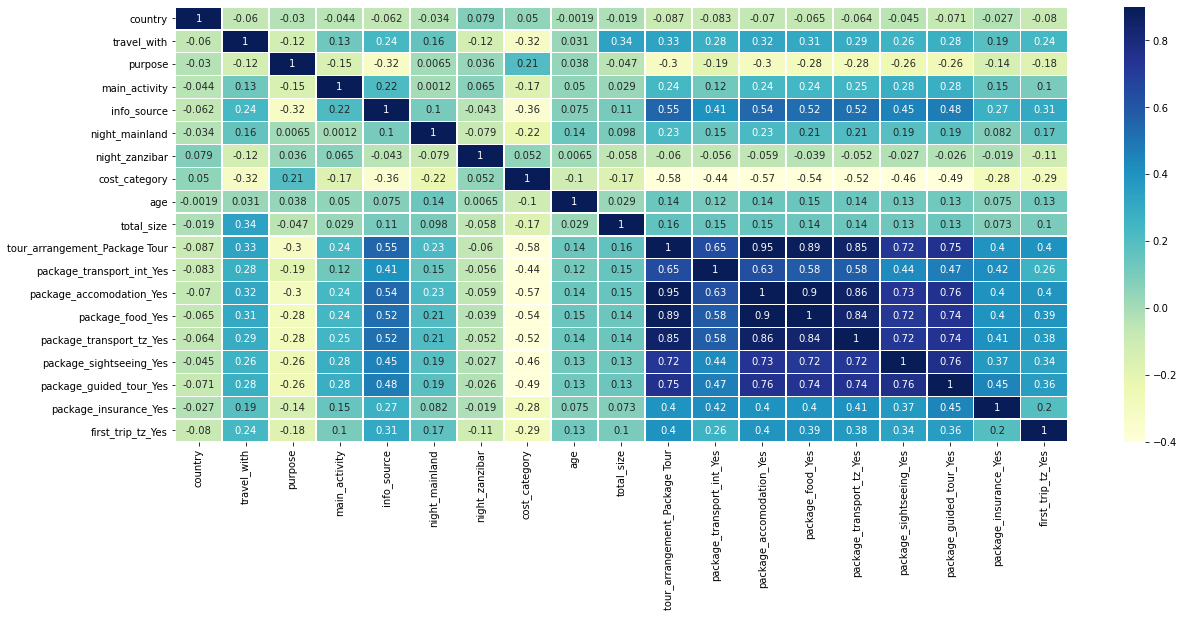

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y=data['cost_category']
x=data.drop(['cost_category'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=.2)
rf=RandomForestClassifier(n_estimators=500,max_depth=100,random_state=42,criterion="entropy")
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
#accuracy percentage for prediction

print("Accuracy percentage is",accuracy_score(y_test,y_pred))
l_score=accuracy_score(y_test,y_pred)
#print("f1_score",f1_score(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))
#print(data.columns)
print(rf.feature_importances_)

corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) 
x_test = sc_x.transform(x_test)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y=data['cost_category']
x=data.drop(['cost_category'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=.2)
rf=RandomForestClassifier(n_estimators=500,max_depth=100,random_state=42,criterion="entropy")
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
#accuracy percentage for prediction

print("Accuracy percentage is",accuracy_score(y_test,y_pred))
rf_score=accuracy_score(y_test,y_pred)
data.columns

Accuracy percentage is 0.5552314983594604


Index(['country', 'travel_with', 'purpose', 'main_activity', 'info_source',
       'night_mainland', 'night_zanzibar', 'cost_category', 'age',
       'total_size', 'tour_arrangement_Package Tour',
       'package_transport_int_Yes', 'package_accomodation_Yes',
       'package_food_Yes', 'package_transport_tz_Yes',
       'package_sightseeing_Yes', 'package_guided_tour_Yes',
       'package_insurance_Yes', 'first_trip_tz_Yes'],
      dtype='object')

In [14]:
#'country', 'travel_with', 'purpose', 'main_activity', 'info_source',
 #      'night_mainland', 'night_zanzibar', 'cost_category', 'age',
 #      'total_size','package_insurance_Yes', 'first_trip_tz_Yes'
#'tour_arrangement_Package Tour',       'package_transport_int_Yes', 'package_accomodation_Yes',
#       'package_food_Yes', 'package_transport_tz_Yes',
#       'package_sightseeing_Yes', 'package_guided_tour_Yes',
data.drop(['country', 'travel_with', 'purpose', 'main_activity','info_source','night_mainland', 'night_zanzibar', 'age','total_size','package_insurance_Yes','first_trip_tz_Yes'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y=data['cost_category']
x=data.drop(['cost_category'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=.2)
rf=RandomForestClassifier(n_estimators=100,max_depth=100,random_state=42,criterion="entropy")
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,recall_score
#accuracy percentage for prediction

print("Accuracy percentage is",accuracy_score(y_test,y_pred))

#data.columns

#print(confusion_matrix(y_test,y_pred))
#print(data.columns)
#print(rf.feature_importances_)

#corrmatrix=data.corr()
#plt.subplots(figsize=(20,8))
#sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')
#rf.feature_importances_
#data.columns
#data.drop(['country','purpose','main_activity','night_mainland','age','total_size'],axis=1,inplace=True)


Accuracy percentage is 0.4553408676631425


In [15]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(x_train,y_train)
result=k.predict(x_test)
print(accuracy_score(y_test,result))
k_score=accuracy_score(y_test,result)

0.24644549763033174


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

print(accuracy_score(y_test,y_pred))
g_score=accuracy_score(y_test,y_pred)

0.45133065986146553


In [ ]:
from sklearn.svm import SVC
estimator = SVC()
# 'C=1.0', "kernel='rbf'", '"gamma='auto_deprecated'"
hparams = {"C": [100], 
                   "kernel": ["rbf", "rbf", "poly"], 
                   "gamma": [0.001]}
from sklearn.model_selection import RandomizedSearchCV
RS_estimator = RandomizedSearchCV(estimator, hparams, cv=5, scoring="accuracy", random_state=1)
RS_estimator.fit(x_train, y_train)
y_pred=RS_estimator.predict(x_test)

print(accuracy_score(y_test,y_pred))
svc_score=accuracy_score(y_test,y_pred)
#RS_estimator.best_params_

In [18]:
#accuracy score for regressions
print("Random forest ",rf_score*100)
print("Logistic Regression ",l_score*100)
print("KNeighbors ",k_score*100)
print("Gradient boosting ",g_score*100)
print("SVC",svc_score*100)

Random forest  55.52314983594604
Logistic Regression  55.52314983594604
KNeighbors  24.644549763033176
Gradient boosting  45.133065986146555


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.44804958075100254


In [ ]:
#data['Package_cost']=data['package_transport_int_Yes']+data['package_accomodation_Yes']+data['package_food_Yes']
#data.drop(['package_transport_int_Yes','package_accomodation_Yes','package_food_Yes'],axis=1,inplace=True)

In [27]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [30]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.6s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  10.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   9.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

KeyboardInterrupt: 

In [34]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_train, y_train)

Model Performance
Average Error: 1.1724 degrees.
Accuracy = -inf%.
